# This file demonstrates the working decision tree

### All file imports

In [2]:
from src.treegen import *
from src.prune import *

In [3]:
import importlib
%load_ext autoreload
%autoreload 2

### Generating the tree on the specified dataset. The default training set is the clean dataset.

In [4]:
#File paths
clean_filepath = "test/clean_dataset.txt"
noisy_filepath = "test/noisy_dataset.txt"
sample_filepath = "test/sample_set.txt"
#Tree instantiation
initNode = treeGen(clean_filepath)
root, depth = initNode.generateTree()

Node completed
Node completed
Node completed
Node completed
Node completed
Node completed
Node completed
Node completed
Node completed


### Tree visualisation

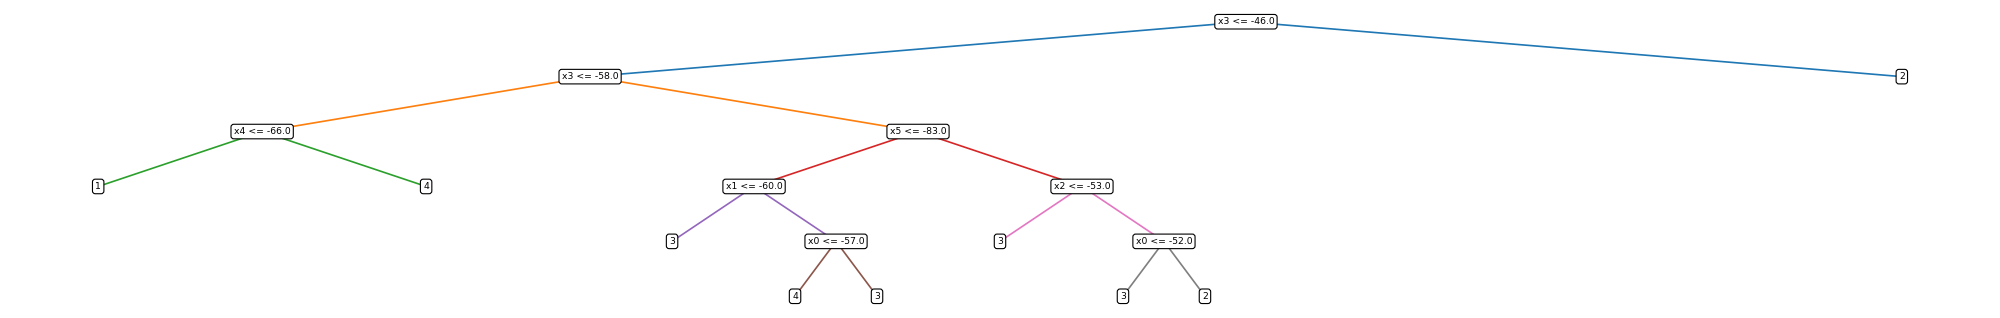

In [5]:
#Tree visualisation
root.visualizeTree(depth, "src/tree_diagram.png", True)